https://www.kaggle.com/anikannal/solar-power-generation-data

Data Analysis Objective :  
1. Analyse the performance of the plant interms of AC power produced. Any anomaly spotted ?   
2. Identify predictors of  AC power based on the input conditions at the plant.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
plant_2_data = pd.read_csv("Plant_2_Generation_Data.csv")

In [3]:
plant_2_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [4]:
plant_2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [5]:
plant_2_data.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [6]:
cols = plant_2_data.columns.tolist()

In [7]:
plant_2_data['date'] = pd.to_datetime(plant_2_data[cols[0]])

In [8]:
plant_2_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,date
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,2020-05-15
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,2020-05-15
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,2020-05-15
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,2020-05-15
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,2020-05-15


In [9]:
plant_2_data['date'].min() , plant_2_data['date'].max()

(Timestamp('2020-05-15 00:00:00'), Timestamp('2020-06-17 23:45:00'))

Around one month of data.    

In [10]:
## Read in Plant 2 Sensor Data 
plant_2_sensor_data = pd.read_csv("Plant_2_Weather_Sensor_Data.csv")

In [11]:
plant_2_sensor_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [12]:
plant_2_sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [13]:
plant_2_sensor_data.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [14]:
plant_2_sensor_data['date'] = pd.to_datetime(plant_2_sensor_data[cols[0]])

In [17]:
plant_2_sensor_data['date'].min() , plant_2_sensor_data['date'].max()

(Timestamp('2020-05-15 00:00:00'), Timestamp('2020-06-17 23:45:00'))

Dates in Sensor data is same as that of Plant data i.e 34 days of data.  

In [16]:
plant_2_data.sort_values(['date'])

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,date
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,2020-05-15 00:00:00
21,2020-05-15 00:00:00,4136001,xoJJ8DcxJEcupym,0.0,0.0,0.000000,2.091436e+08,2020-05-15 00:00:00
20,2020-05-15 00:00:00,4136001,xMbIugepa2P7lBB,0.0,0.0,9166.000000,1.066566e+08,2020-05-15 00:00:00
19,2020-05-15 00:00:00,4136001,vOuJvMaM2sgwLmb,0.0,0.0,0.000000,2.211962e+06,2020-05-15 00:00:00
18,2020-05-15 00:00:00,4136001,rrq4fwE8jgrTyWY,0.0,0.0,280.214286,1.209641e+08,2020-05-15 00:00:00
...,...,...,...,...,...,...,...,...
67677,2020-06-17 23:45:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,4306.000000,1.215486e+09,2020-06-17 23:45:00
67676,2020-06-17 23:45:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,4446.000000,2.653495e+06,2020-06-17 23:45:00
67696,2020-06-17 23:45:00,4136001,xMbIugepa2P7lBB,0.0,0.0,4218.000000,1.068964e+08,2020-06-17 23:45:00
67685,2020-06-17 23:45:00,4136001,PeE6FRyGXUgsRhN,0.0,0.0,4258.000000,1.348549e+09,2020-06-17 23:45:00


In [17]:
## How many plant ids?
plant_2_data[cols[1]].value_counts()

4136001    67698
Name: PLANT_ID, dtype: int64

In [18]:
## How many sources ?
plant_2_data[cols[2]].value_counts()

rrq4fwE8jgrTyWY    3259
9kRcWv60rDACzjR    3259
PeE6FRyGXUgsRhN    3259
q49J1IKaHRwDQnt    3259
LYwnQax7tkwH5Cb    3259
LlT2YUhhzqhg5Sw    3259
81aHJ1q11NBPMrL    3259
oZZkBaNadn6DNKz    3259
xoJJ8DcxJEcupym    3259
vOuJvMaM2sgwLmb    3259
V94E5Ben1TlhnDV    3259
WcxssY2VbP4hApt    3259
Qf4GUc1pJu5T6c6    3195
Quc1TzYxW2pYoWX    3195
4UPUqMRk7TRMgml    3195
oZ35aAeoifZaQzV    3195
Et9kgGMDl729KT4    3195
Mx2yZCDsyf6DPfv    3195
IQ2d7wF4YD8zU1Q    2355
xMbIugepa2P7lBB    2355
mqwcsP2rE7J0TFp    2355
NgDl19wMapZy17u    2355
Name: SOURCE_KEY, dtype: int64

In [18]:
plant_2_data[cols[2]].unique().shape

(22,)

There are 22 sources/inverters in the plant.  

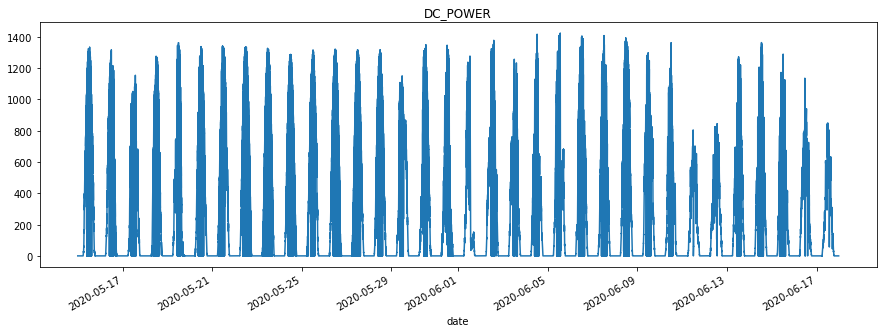

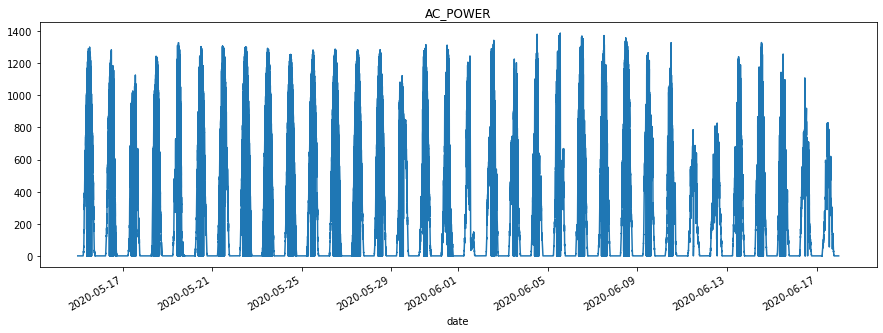

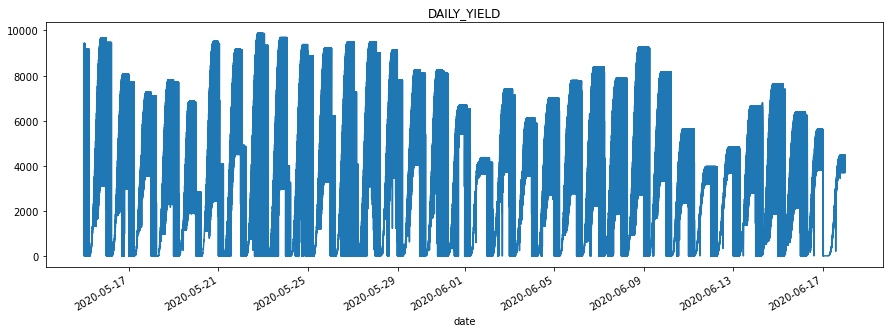

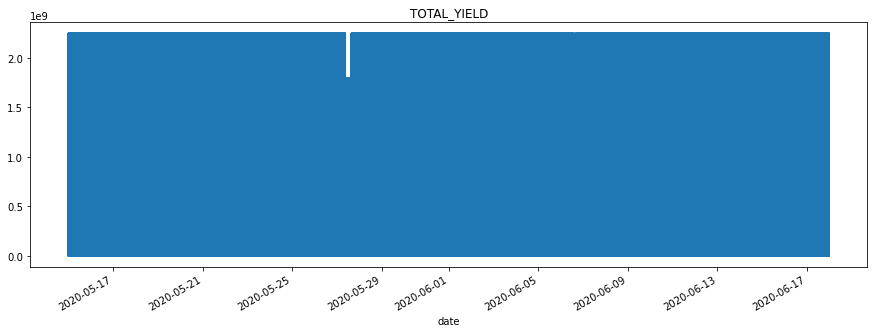

In [19]:
for c in cols[3:]:
    plt.figure(figsize = (15,5))
    plant_2_data.set_index(['date'])[c].plot()
    plt.title(c)

A dip in AC Power is observed @ June 11- 13th.  

Text(0.5, 1.0, 'Power for day 05/15/20')

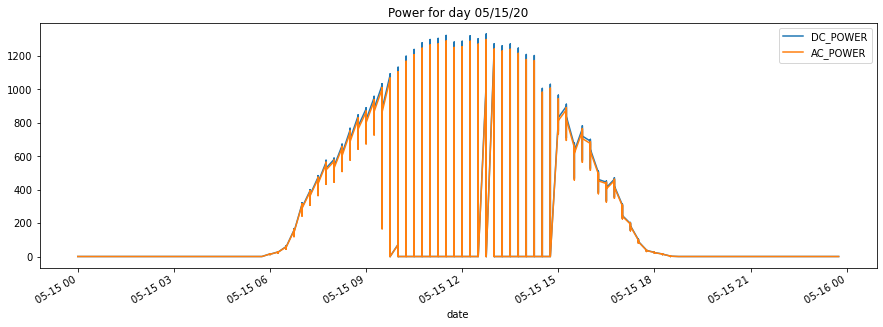

In [20]:
## Simlarly Visualize the DC and AC power for a day and two consecutive days 
plant_2_data.set_index(['date']).loc['2020-05-15'][['DC_POWER','AC_POWER']].plot(figsize = (15,5))
plt.title("Power for day 05/15/20")

AC Power increases from 6 am till Noon and decreases till 7 pm. There are intermittent zero values between these hours and the reason for the zero values need to be checked.  

Text(0.5, 1.0, 'Power for two consecutive days ')

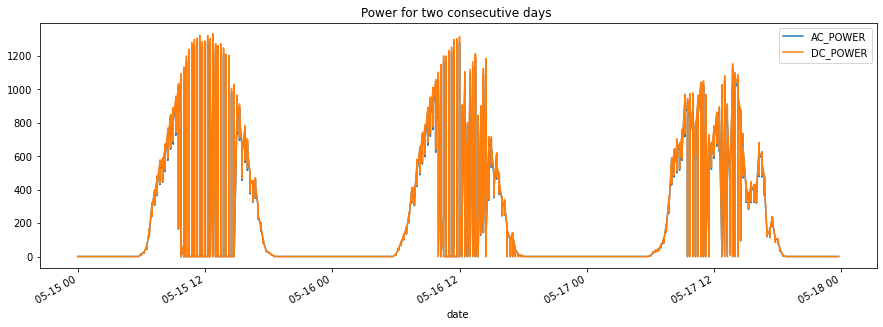

In [21]:
## Power for two consecutive days of irradiance 
plant_2_data.set_index(['date']).loc['2020-05-15' : '2020-05-17'][['AC_POWER','DC_POWER']].plot(figsize = (15,5))
plt.title("Power for two consecutive days ")

In [22]:
## Ratio of AC to DC Power
(plant_2_data[plant_2_data['DC_POWER'] > 0]['AC_POWER']/plant_2_data[plant_2_data['DC_POWER'] > 0]['DC_POWER']).mean()

0.9768063442756146

Power is generated between 6 am to 6 pm.  DC Power and AC 

AC to DC Conversion is 97%

Text(0.5, 1.0, 'Yield for day 05/15/20')

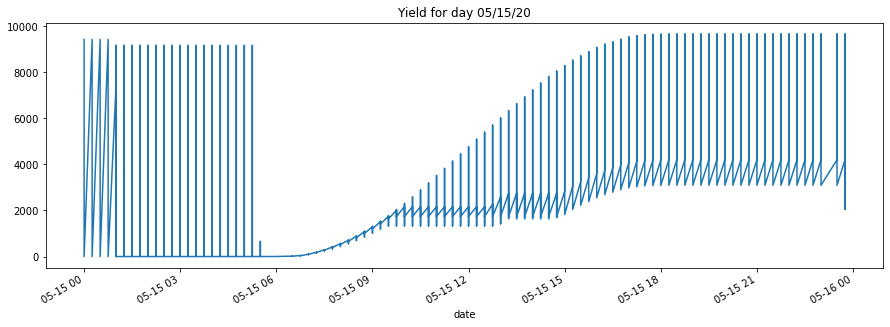

In [23]:
## Yield for a day of irradiance 
plant_2_data.set_index(['date']).loc['2020-05-15']['DAILY_YIELD'].plot(figsize = (15,5))
plt.title("Yield for day 05/15/20")

Its seen that the yield rises slowly  after 9 am and becomes maximum @17pm .

Yield exists in the early morning too -- before 6am.  

Text(0.5, 1.0, 'Yield for two consecutive days ')

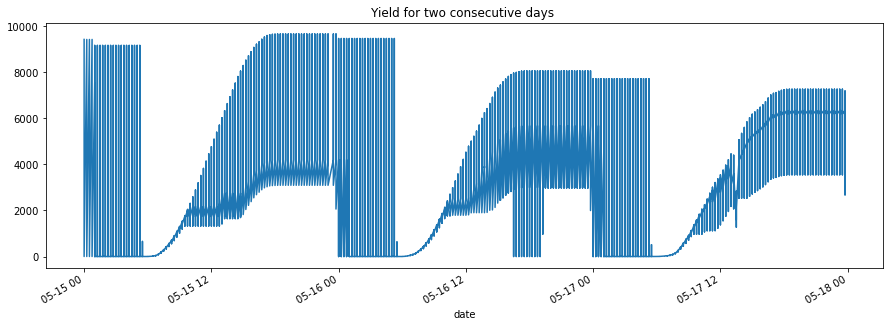

In [24]:
## Yield for two consecutive days of irradiance 
plant_2_data.set_index(['date']).loc['2020-05-15' : '2020-05-17']['DAILY_YIELD'].plot(figsize = (15,5))
plt.title("Yield for two consecutive days ")

Text(0.5, 1.0, 'Daily Yield ')

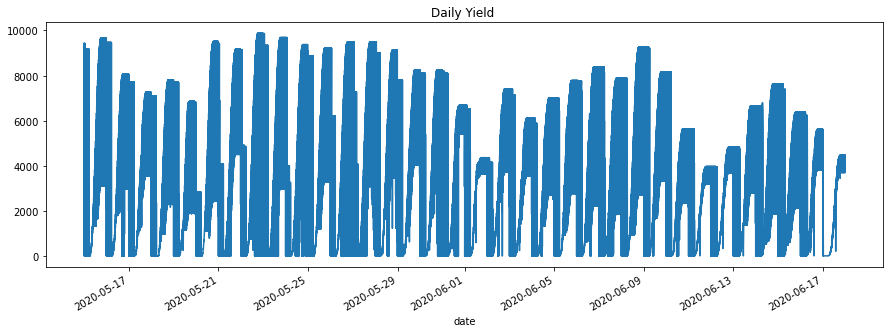

In [25]:
plant_2_data.set_index(['date'])['DAILY_YIELD'].plot(figsize = (15,5))
plt.title("Daily Yield ")

In [26]:
## What are the top 3 maximum yields and when was it achieved ?
plant_2_data.sort_values(['DAILY_YIELD'] , ascending = False).head(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,date
15330,2020-05-22 22:45:00,4136001,Qf4GUc1pJu5T6c6,0.000000,0.000000,9873.0,838481253.0,2020-05-22 22:45:00
15150,2020-05-22 20:15:00,4136001,Qf4GUc1pJu5T6c6,0.000000,0.000000,9873.0,838481253.0,2020-05-22 20:15:00
15024,2020-05-22 18:30:00,4136001,Qf4GUc1pJu5T6c6,0.546667,0.526667,9873.0,838481253.0,2020-05-22 18:30:00
15042,2020-05-22 18:45:00,4136001,Qf4GUc1pJu5T6c6,0.000000,0.000000,9873.0,838481253.0,2020-05-22 18:45:00
15060,2020-05-22 19:00:00,4136001,Qf4GUc1pJu5T6c6,0.000000,0.000000,9873.0,838481253.0,2020-05-22 19:00:00
15078,2020-05-22 19:15:00,4136001,Qf4GUc1pJu5T6c6,0.000000,0.000000,9873.0,838481253.0,2020-05-22 19:15:00
15384,2020-05-22 23:30:00,4136001,Qf4GUc1pJu5T6c6,0.000000,0.000000,9873.0,838481253.0,2020-05-22 23:30:00
15096,2020-05-22 19:30:00,4136001,Qf4GUc1pJu5T6c6,0.000000,0.000000,9873.0,838481253.0,2020-05-22 19:30:00
15366,2020-05-22 23:15:00,4136001,Qf4GUc1pJu5T6c6,0.000000,0.000000,9873.0,838481253.0,2020-05-22 23:15:00
15348,2020-05-22 23:00:00,4136001,Qf4GUc1pJu5T6c6,0.000000,0.000000,9873.0,838481253.0,2020-05-22 23:00:00


Maximum Yield obtained on 25th May 2020.  

In [27]:
# What are the top 3 maximum AC Power  and when was it achieved ?
plant_2_data.sort_values(['AC_POWER'] , ascending = False).head(10)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,date
41423,2020-06-05 13:15:00,4136001,oZ35aAeoifZaQzV,1420.933333,1385.420000,5561.866667,1.660124e+09,2020-06-05 13:15:00
41408,2020-06-05 13:15:00,4136001,4UPUqMRk7TRMgml,1419.840000,1384.346667,5626.800000,2.583031e+06,2020-06-05 13:15:00
41412,2020-06-05 13:15:00,4136001,IQ2d7wF4YD8zU1Q,1418.928571,1383.457143,5695.214286,2.010828e+07,2020-06-05 13:15:00
39248,2020-06-04 12:30:00,4136001,rrq4fwE8jgrTyWY,1414.120000,1378.766667,3822.866667,1.210767e+08,2020-06-04 12:30:00
41415,2020-06-05 13:15:00,4136001,Mx2yZCDsyf6DPfv,1412.466667,1377.153333,5594.266667,2.614668e+06,2020-06-05 13:15:00
39250,2020-06-04 12:30:00,4136001,xMbIugepa2P7lBB,1408.860000,1373.653333,3958.800000,1.068121e+08,2020-06-04 12:30:00
41334,2020-06-05 12:15:00,4136001,mqwcsP2rE7J0TFp,1407.220000,1372.020000,4255.666667,5.937394e+08,2020-06-05 12:15:00
45560,2020-06-07 12:15:00,4136001,oZZkBaNadn6DNKz,1406.433333,1371.280000,3922.400000,1.708230e+09,2020-06-07 12:15:00
45565,2020-06-07 12:15:00,4136001,xoJJ8DcxJEcupym,1406.166667,1371.013333,3833.666667,2.092729e+08,2020-06-07 12:15:00
41416,2020-06-05 13:15:00,4136001,NgDl19wMapZy17u,1406.114286,1370.957143,5599.642857,1.116731e+08,2020-06-05 13:15:00


Maximum AC Power obtained on June 4th , 5th and 7th.   

Text(0.5, 1.0, 'Daily Yield')

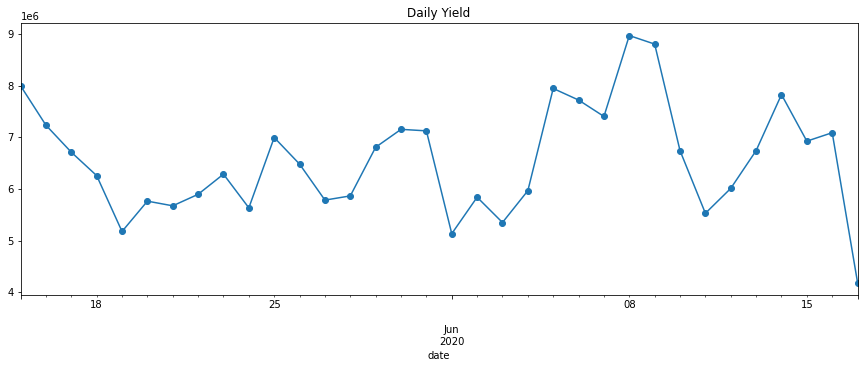

In [28]:
## How much is the daily , monthly and yearly 'daily yield' per source ? 
plant_2_data['year'] = plant_2_data['date'].dt.year
##
plant_2_data['month'] = plant_2_data['date'].dt.month
##
plant_2_data['dayofweek'] = plant_2_data['date'].dt.dayofweek
##
plant_2_data['day'] = plant_2_data['date'].dt.day
##
plant_2_data.set_index(['date']).resample('D')['DAILY_YIELD'].sum().plot(style = '-o', figsize = (15,5))
plt.title("Daily Yield")

Text(0.5, 1.0, 'Daily AC Power')

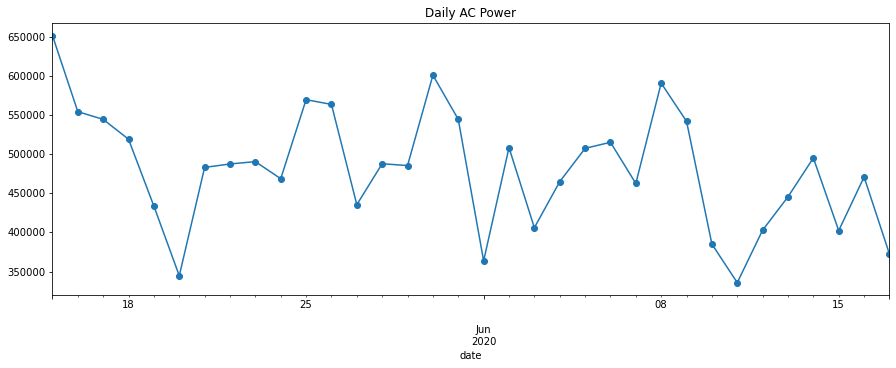

In [29]:
plant_2_data.set_index(['date']).resample('D')['AC_POWER'].sum().plot(style = '-o', figsize = (15,5))
plt.title("Daily AC Power")

Total AC Power for the day varies between 350K to 650K (units)

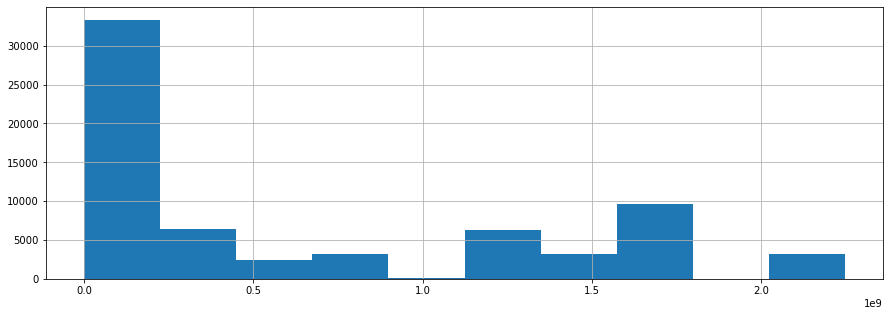

In [30]:
## Plot Distribution of Total Yield 
plant_2_data['TOTAL_YIELD'].hist(figsize = (15,5))

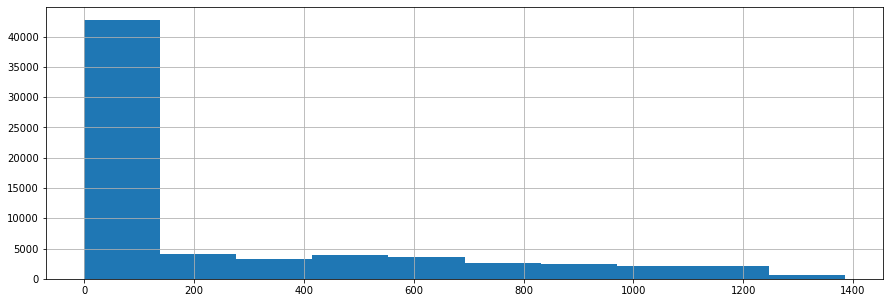

In [31]:
## Plot Distribution of AC Power
plant_2_data['AC_POWER'].hist(figsize = (15,5))

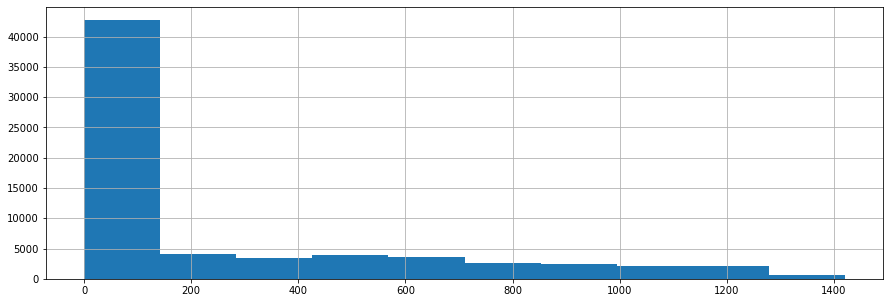

In [32]:
## Plot Distribution of DC Power
plant_2_data['DC_POWER'].hist(figsize = (15,5))

DC POWER and AC POWER are positiuvely skewed.  

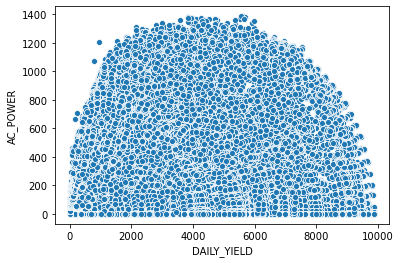

In [34]:
## Are the DAILY YIELD AND AC POWER Correlated.
sns.scatterplot('DAILY_YIELD' , 'AC_POWER', data = plant_2_data)

In [35]:
plant_2_data.corr()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,year,month,dayofweek,day
PLANT_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DC_POWER,NaN,1.000000,0.999997,0.005593,0.004528,NaN,-0.080431,0.016704,0.063663
AC_POWER,NaN,0.999997,1.000000,0.005395,0.004533,NaN,-0.080248,0.016702,0.063580
DAILY_YIELD,NaN,0.005593,0.005395,1.000000,-0.068472,NaN,-0.040094,0.023955,0.041133
TOTAL_YIELD,NaN,0.004528,0.004533,-0.068472,1.000000,NaN,-0.032167,0.000137,0.029593
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,-0.080431,-0.080248,-0.040094,-0.032167,NaN,1.000000,-0.186411,-0.811705
dayofweek,NaN,0.016704,0.016702,0.023955,0.000137,NaN,-0.186411,1.000000,0.210568
day,NaN,0.063663,0.063580,0.041133,0.029593,NaN,-0.811705,0.210568,1.000000


Poor correlation between Daily Yield and AC Power

In [36]:
## Combine sensor data and plant data 
plant_2_sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3259 non-null   object        
 1   PLANT_ID             3259 non-null   int64         
 2   SOURCE_KEY           3259 non-null   object        
 3   AMBIENT_TEMPERATURE  3259 non-null   float64       
 4   MODULE_TEMPERATURE   3259 non-null   float64       
 5   IRRADIATION          3259 non-null   float64       
 6   date                 3259 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 178.4+ KB


In [37]:
cols2 = plant_2_sensor_data.columns.tolist()

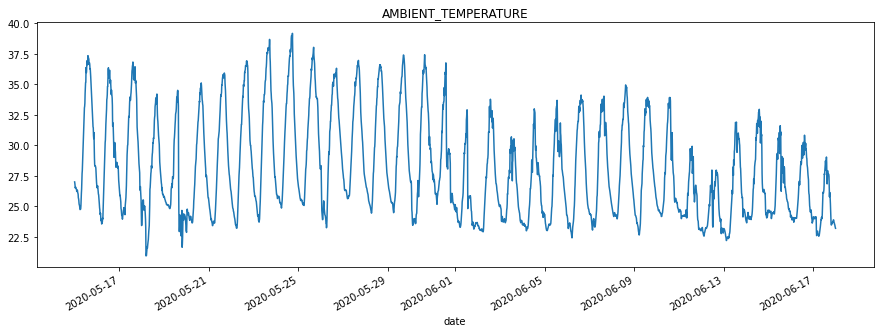

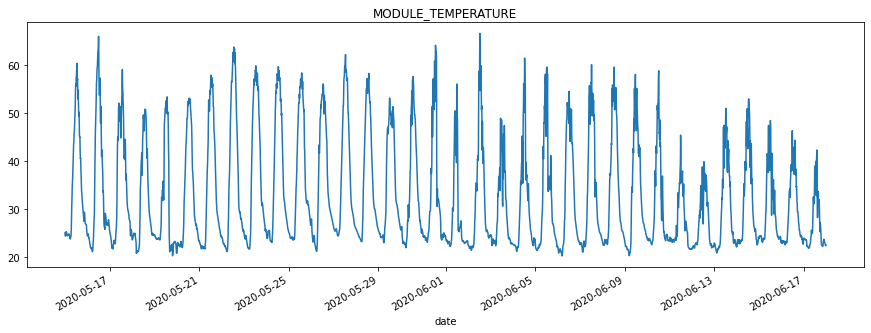

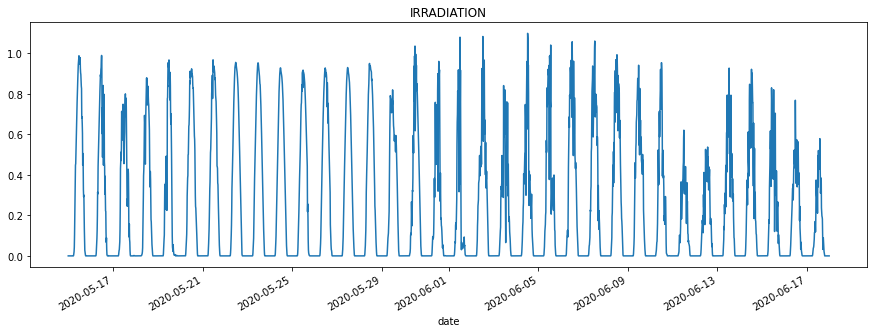

In [38]:
## Plot the sensor data 
for c in cols2[3:6]:
    plt.figure(figsize = (15,5))
    plant_2_sensor_data.set_index(['date'])[c].plot()
    plt.title(c)

Lesser Irradiance observed @ June 11-13th , explaining the dip in the AC POWER.  

In [39]:
plant_2_sensor_data.set_index(['date']).loc['2020-05-17']

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
date,,,,,,
2020-05-17 00:00:00,2020-05-17 00:00:00,4136001,iq8k7ZNt4Mwm3w0,26.290046,25.420961,0.000000
2020-05-17 00:15:00,2020-05-17 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.148866,25.074881,0.000000
2020-05-17 00:30:00,2020-05-17 00:30:00,4136001,iq8k7ZNt4Mwm3w0,25.883551,24.725846,0.000000
2020-05-17 00:45:00,2020-05-17 00:45:00,4136001,iq8k7ZNt4Mwm3w0,25.906168,24.595491,0.000000
2020-05-17 01:00:00,2020-05-17 01:00:00,4136001,iq8k7ZNt4Mwm3w0,25.762797,24.348200,0.000000
...,...,...,...,...,...,...
2020-05-17 22:45:00,2020-05-17 22:45:00,4136001,iq8k7ZNt4Mwm3w0,26.279789,25.810258,0.001039
2020-05-17 23:00:00,2020-05-17 23:00:00,4136001,iq8k7ZNt4Mwm3w0,26.047403,25.582710,0.000746
2020-05-17 23:15:00,2020-05-17 23:15:00,4136001,iq8k7ZNt4Mwm3w0,25.518677,25.402042,0.000143


Sensor data is for every 15 minutes   

In [40]:
plant_2_sensor_data['SOURCE_KEY'].unique()

array(['iq8k7ZNt4Mwm3w0'], dtype=object)

There is just one value for 'SOURCE_KEY' in the sensor data file whereas in the Plant data file , there are many values. Hence the join keys are 'date' and 'plant_id'.  

In [41]:
combined_df = pd.merge(plant_2_data , plant_2_sensor_data , on = ['date', 'PLANT_ID'], how = 'left')
combined_df.head()

,DATE_TIME_x,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,date,year,month,dayofweek,day,DATE_TIME_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,2020-05-15,2020,5,4,15,2020-05-15 00:00:00,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,2020-05-15,2020,5,4,15,2020-05-15 00:00:00,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,2020-05-15,2020,5,4,15,2020-05-15 00:00:00,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,2020-05-15,2020,5,4,15,2020-05-15 00:00:00,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,2020-05-15,2020,5,4,15,2020-05-15 00:00:00,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0


In [42]:
combined_df.shape

(67698, 17)

In [43]:
combined_df.isnull().sum()

DATE_TIME_x            0
PLANT_ID               0
SOURCE_KEY_x           0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
date                   0
year                   0
month                  0
dayofweek              0
day                    0
DATE_TIME_y            0
SOURCE_KEY_y           0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

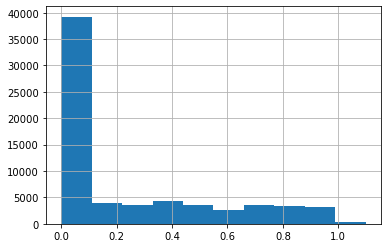

In [44]:
## plot the irradiance 
combined_df['IRRADIATION'].hist()

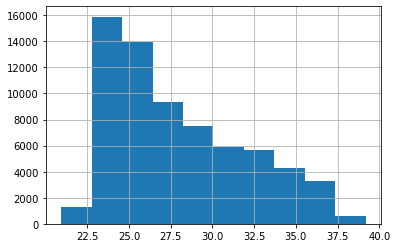

In [45]:
## plot the ambient temperature 
combined_df['AMBIENT_TEMPERATURE'].hist()

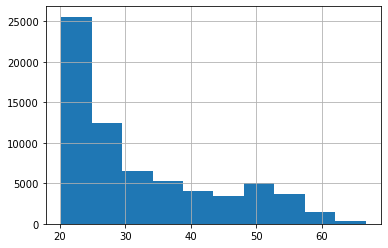

In [46]:
## plot the temperature
combined_df['MODULE_TEMPERATURE'].hist()

Text(0.5, 1.0, "'AMBIENT_TEMPERATURE'")

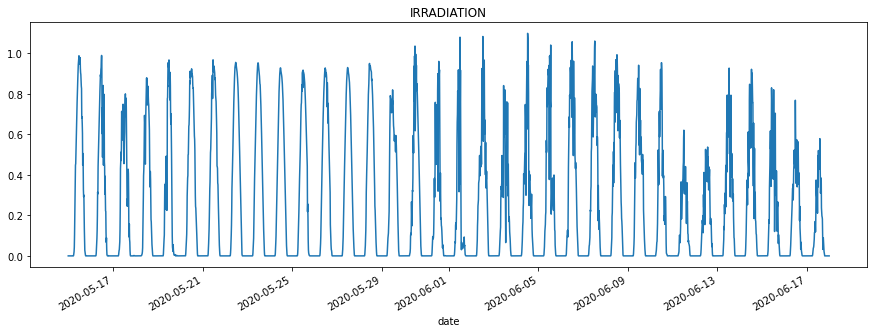

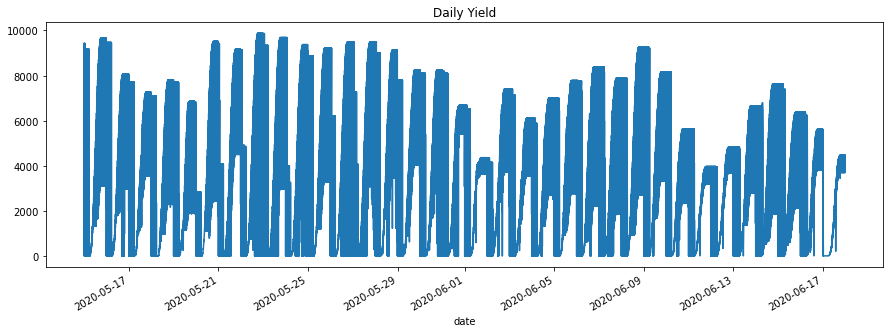

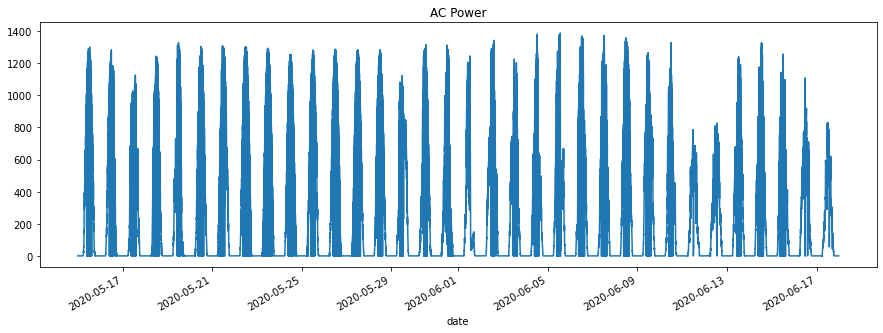

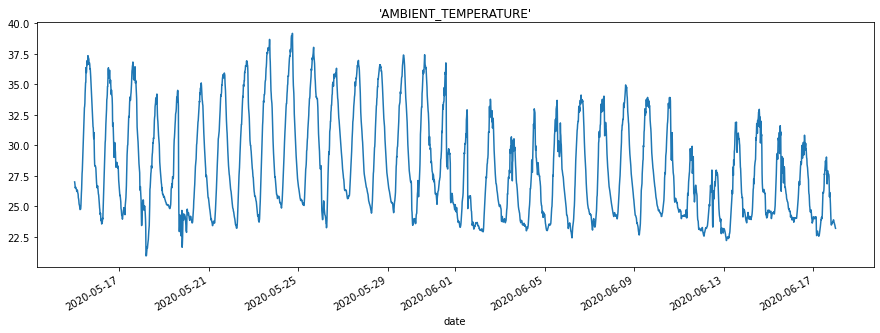

In [47]:
## Plot the Values by time.
plt.figure(figsize = (15,5))
combined_df.set_index(['date'])['IRRADIATION'].plot()
plt.title("IRRADIATION")
plt.figure(figsize = (15,5))
combined_df.set_index(['date'])['DAILY_YIELD'].plot()
plt.title("Daily Yield")
plt.figure(figsize = (15,5))
combined_df.set_index(['date'])['AC_POWER'].plot()
plt.title("AC Power")
plt.figure(figsize = (15,5))
combined_df.set_index(['date'])['AMBIENT_TEMPERATURE'].plot()
plt.title("'AMBIENT_TEMPERATURE'")

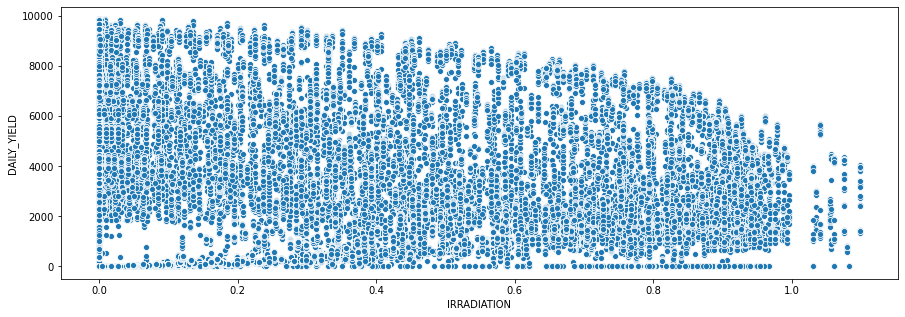

In [48]:
## scatter plot 
plt.figure(figsize = (15,5))
sns.scatterplot('IRRADIATION' , 'DAILY_YIELD', data = combined_df)

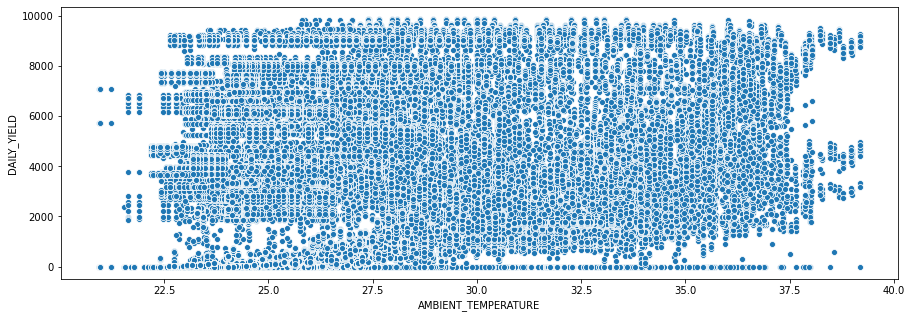

In [49]:
## scatter plot 
plt.figure(figsize = (15,5))
sns.scatterplot('AMBIENT_TEMPERATURE' , 'DAILY_YIELD', data = combined_df)

In [50]:
## Check coorelation 
combined_df.corr()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,year,month,dayofweek,day,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
PLANT_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DC_POWER,NaN,1.000000,0.999997,0.005593,0.004528,NaN,-0.080431,0.016704,0.063663,0.563232,0.749676,0.780978
AC_POWER,NaN,0.999997,1.000000,0.005395,0.004533,NaN,-0.080248,0.016702,0.063580,0.563324,0.749604,0.780851
DAILY_YIELD,NaN,0.005593,0.005395,1.000000,-0.068472,NaN,-0.040094,0.023955,0.041133,0.321785,0.046787,-0.107987
TOTAL_YIELD,NaN,0.004528,0.004533,-0.068472,1.000000,NaN,-0.032167,0.000137,0.029593,0.002774,-0.004646,-0.006720
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,-0.080431,-0.080248,-0.040094,-0.032167,NaN,1.000000,-0.186411,-0.811705,-0.355423,-0.183838,-0.092924
dayofweek,NaN,0.016704,0.016702,0.023955,0.000137,NaN,-0.186411,1.000000,0.210568,0.115954,0.067305,0.031506
day,NaN,0.063663,0.063580,0.041133,0.029593,NaN,-0.811705,0.210568,1.000000,0.285063,0.133412,0.057505
AMBIENT_TEMPERATURE,NaN,0.563232,0.563324,0.321785,0.002774,NaN,-0.355423,0.115954,0.285063,1.000000,0.848976,0.671998


It's seen that IRRADIATION has a  good correlation with DC and AC Power and MODULE  TEMPERATURE.    


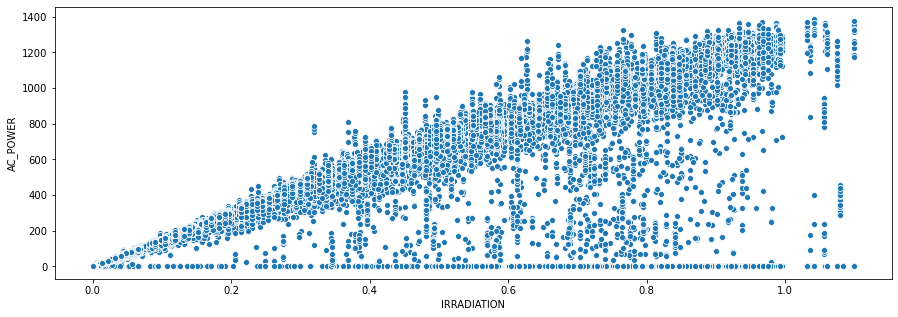

In [51]:
## Plot scatter plot to check the correlation. 
plt.figure(figsize = (15,5))
sns.scatterplot('IRRADIATION', 'AC_POWER', data = combined_df)

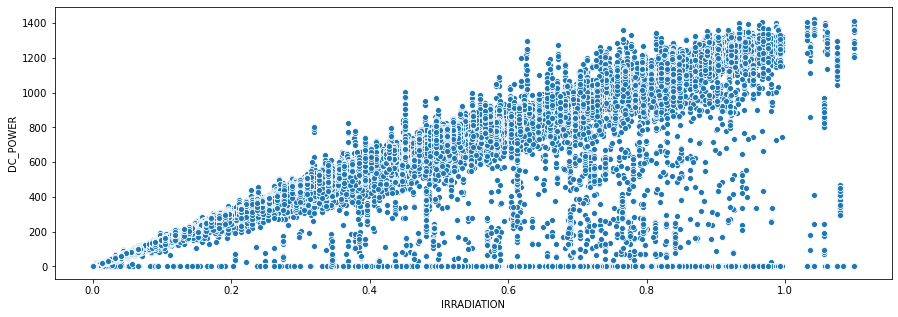

In [52]:
## 
plt.figure(figsize = (15,5))
sns.scatterplot('IRRADIATION', 'DC_POWER', data = combined_df)

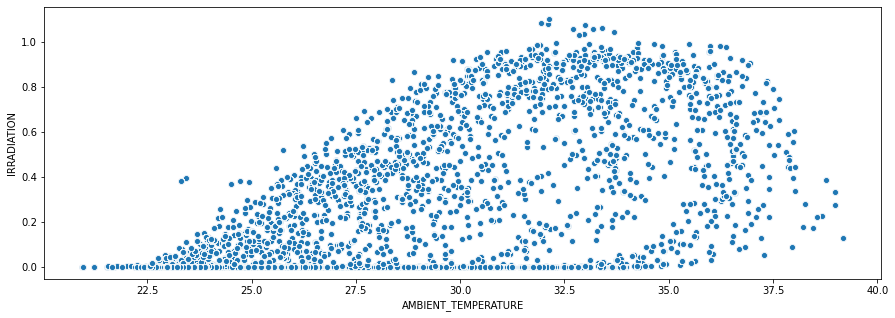

In [53]:
## 
plt.figure(figsize = (15,5))
sns.scatterplot('AMBIENT_TEMPERATURE', 'IRRADIATION', data = combined_df)

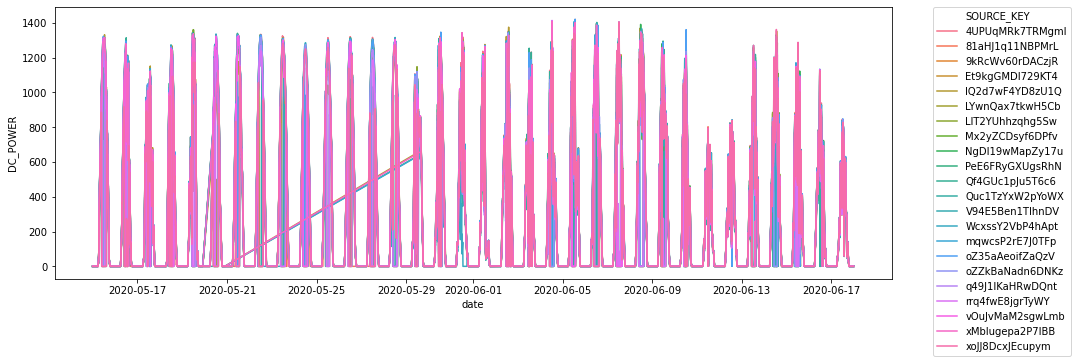

In [54]:
## Plant data is at Inverter level i.e Source_Key level . Check inverter performance by looking into AC/DC Power.
plt.figure(figsize = (15,5))
sns.lineplot('date', 'DC_POWER', data = plant_2_data , hue = 'SOURCE_KEY')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text major ticklabel objects>)

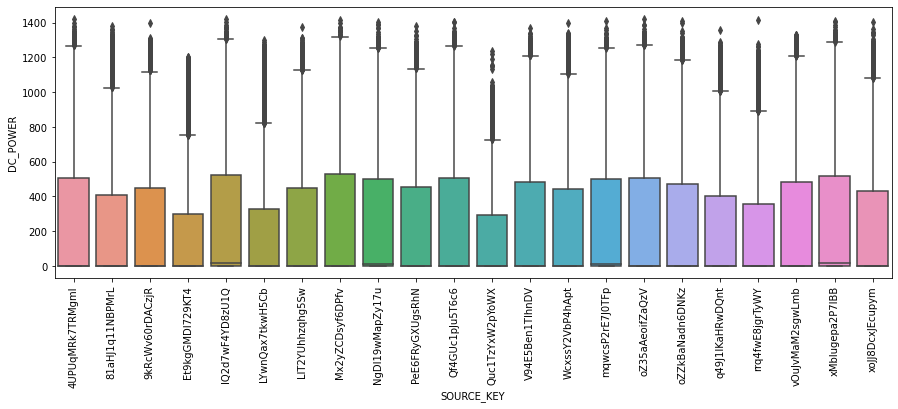

In [56]:
plt.figure(figsize = (15,5))
sns.boxplot('SOURCE_KEY', 'DC_POWER', data =  plant_2_data)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text major ticklabel objects>)

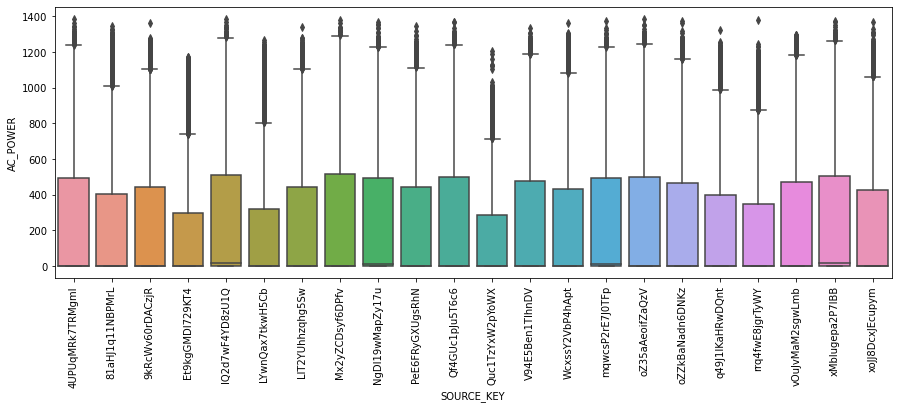

In [57]:
plt.figure(figsize = (15,5))
sns.boxplot('SOURCE_KEY', 'AC_POWER', data =  plant_2_data)
plt.xticks(rotation = 90)

In [58]:
combined_df['date'].min() , combined_df['date'].max()

(Timestamp('2020-05-15 00:00:00'), Timestamp('2020-06-17 23:45:00'))

In [59]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67698 entries, 0 to 67697
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME_x          67698 non-null  object        
 1   PLANT_ID             67698 non-null  int64         
 2   SOURCE_KEY_x         67698 non-null  object        
 3   DC_POWER             67698 non-null  float64       
 4   AC_POWER             67698 non-null  float64       
 5   DAILY_YIELD          67698 non-null  float64       
 6   TOTAL_YIELD          67698 non-null  float64       
 7   date                 67698 non-null  datetime64[ns]
 8   year                 67698 non-null  int64         
 9   month                67698 non-null  int64         
 10  dayofweek            67698 non-null  int64         
 11  day                  67698 non-null  int64         
 12  DATE_TIME_y          67698 non-null  object        
 13  SOURCE_KEY_y         67698 non-

In [60]:
combined_df.drop(['DATE_TIME_x', 'DATE_TIME_y'], axis = 1 , inplace = True)

In [61]:
combined_df.head()

,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,date,year,month,dayofweek,day,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,2020-05-15,2020,5,4,15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,2020-05-15,2020,5,4,15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
2,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,2020-05-15,2020,5,4,15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
3,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,2020-05-15,2020,5,4,15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
4,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,2020-05-15,2020,5,4,15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0


In [62]:
## save the file 
combined_df.to_csv("combined_df_2.csv", index = False)

Summary :

Plant 2 data is from May  2020 to June 2020. The sensor data is alsdo for the same dates.  
Inverter Efficieny : The Source Key are the Inverter panel which convert the DC Power to AC. The AC Power is 97% of the DC Power.
The Inverter output varies as seen in the boxplot and 3 panels seem to have lesser AC Power.  
AC Power generation: DC / AC Power is typically generated between 6am to 18pm every day.
Combining the Sensor values for Temperature and Irradiation and the Plant output , it is seen that Irradiation is directly proportional to DC/AC Power and is highly correlated at 0.7.
Ambient Temperature is also correlated to AC /DC Power at 0.56.